### end to end fraud detection
***steps involved***
   1. problem formulation
   2. Data
   3. Evaluation
   4. Features
   5. Modeling
   7. Experimentation
 1. problem formulation
   > develop a model for predicting fraudulent transactions.
 2. Data
   > Dataset available called fraud
 3. Evaluation
  >  devlop a model to attain certin accuracy.
 4. Features 
  > here we can get the information about each attribute/column of our data set
  
    step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
    type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
    amount - amount of the transaction in local currency.
    nameOrig - customer who started the transaction
    oldbalanceOrg - initial balance before the transaction
    newbalanceOrig - new balance after the transaction
    nameDest - customer who is the recipient of the transaction
    oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that       start with M (Merchants).
    newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start       with M (Merchants).
    isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the        fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by    transferring to another account and then cashing out of the system.
   isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal   attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.
   
 5. Modeling
 6. Experimentation.

In [1]:
# lets import some important libraries for Data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('insaid/Fraud.csv',low_memory=False)

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
len(data)

6362620

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
#lets check the correltion between the attributes
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


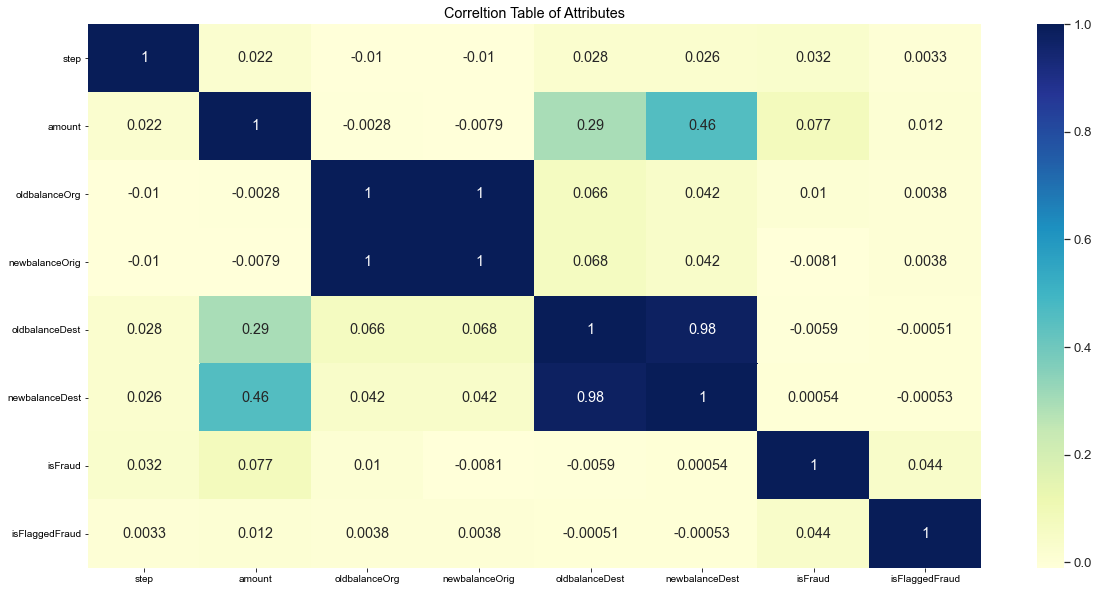

In [8]:
# lets visualise the correlation
corr = data.corr()
fig,ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=1.2)
ax=sns.heatmap(corr,annot=True,cmap='YlGnBu')
ax.set(title='Correltion Table of Attributes');

In [9]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [10]:
#lets take a random sample pf our data for Exploratory data analysis.
df=data.sample(frac=0.01)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63626 entries, 1014827 to 3921210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            63626 non-null  int64  
 1   type            63626 non-null  object 
 2   amount          63626 non-null  float64
 3   nameOrig        63626 non-null  object 
 4   oldbalanceOrg   63626 non-null  float64
 5   newbalanceOrig  63626 non-null  float64
 6   nameDest        63626 non-null  object 
 7   oldbalanceDest  63626 non-null  float64
 8   newbalanceDest  63626 non-null  float64
 9   isFraud         63626 non-null  int64  
 10  isFlaggedFraud  63626 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 5.8+ MB


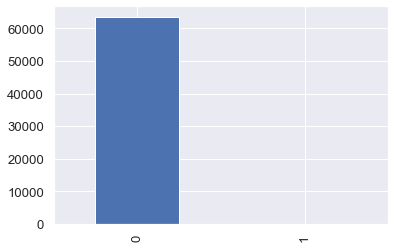

In [12]:
df['isFraud'].value_counts().plot(kind='bar');

In [13]:
df['isFraud'].value_counts()

0    63552
1       74
Name: isFraud, dtype: int64

### As we can see above plotted graph the rate of fraudent occurance in a data is very low therefore it is not visible in graph

In [14]:
#lets have a look on the statistics
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [15]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,63626.000000,6.362600e+04,6.362600e+04,6.362600e+04,6.362600e+04,6.362600e+04,63626.000000,63626.0
mean,243.786895,1.771372e+05,8.295175e+05,8.515693e+05,1.101030e+06,1.220861e+06,0.001163,0.0
std,142.146594,5.507167e+05,2.860287e+06,2.897699e+06,3.492016e+06,3.707217e+06,0.034084,0.0
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,155.000000,1.331850e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,240.000000,7.482074e+04,1.340300e+04,0.000000e+00,1.378350e+05,2.179311e+05,0.000000,0.0
75%,334.000000,2.091211e+05,1.065768e+05,1.399479e+05,9.449181e+05,1.115022e+06,0.000000,0.0
max,738.000000,4.872410e+07,3.410658e+07,3.421975e+07,2.362512e+08,2.359895e+08,1.000000,0.0


In [16]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [17]:
#lets create a temp data frame so that the changes will not reflect in our original dataset
temp_data = data.copy()

In [18]:
temp_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [19]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [20]:
# as we can see the there are object data types in our dataset for mos=delling we need to change them to categories
for colNames,content in temp_data.items():
    if pd.api.types.is_string_dtype(content):
        print(colNames)

type
nameOrig
nameDest


In [21]:
for colNames,content in temp_data.items():
    if pd.api.types.is_numeric_dtype(content):
        print(colNames)

step
amount
oldbalanceOrg
newbalanceOrig
oldbalanceDest
newbalanceDest
isFraud
isFlaggedFraud


### now we can see above cleary which attribute is numeric type and which attribute is non-numeric type
   
   as we know machine learning models can be applied on numeric types so we need to convert non-numerics to categorie

In [22]:
for colNames,content in temp_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        temp_data[colNames]=content.astype('category').cat.as_ordered()
        

In [23]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            int64   
 1   type            category
 2   amount          float64 
 3   nameOrig        category
 4   oldbalanceOrg   float64 
 5   newbalanceOrig  float64 
 6   nameDest        category
 7   oldbalanceDest  float64 
 8   newbalanceDest  float64 
 9   isFraud         int64   
 10  isFlaggedFraud  int64   
dtypes: category(3), float64(5), int64(3)
memory usage: 752.2 MB


In [24]:
pd.Categorical(temp_data['type']).codes

array([3, 3, 4, ..., 1, 4, 1], dtype=int8)

In [25]:
temp_data['type'][:20]

0      PAYMENT
1      PAYMENT
2     TRANSFER
3     CASH_OUT
4      PAYMENT
5      PAYMENT
6      PAYMENT
7      PAYMENT
8      PAYMENT
9        DEBIT
10       DEBIT
11     PAYMENT
12     PAYMENT
13     PAYMENT
14     PAYMENT
15    CASH_OUT
16     PAYMENT
17     PAYMENT
18     PAYMENT
19    TRANSFER
Name: type, dtype: category
Categories (5, object): ['CASH_IN' < 'CASH_OUT' < 'DEBIT' < 'PAYMENT' < 'TRANSFER']

In [26]:
temp_data.head().T

,0,1,2,3,4
step,1,1,1,1,1
type,PAYMENT,PAYMENT,TRANSFER,CASH_OUT,PAYMENT
amount,9839.64,1864.28,181,181,11668.1
nameOrig,C1231006815,C1666544295,C1305486145,C840083671,C2048537720
oldbalanceOrg,170136,21249,181,181,41554
newbalanceOrig,160296,19384.7,0,0,29885.9
nameDest,M1979787155,M2044282225,C553264065,C38997010,M1230701703
oldbalanceDest,0,0,0,21182,0
newbalanceDest,0,0,0,0,0
isFraud,0,0,1,1,0


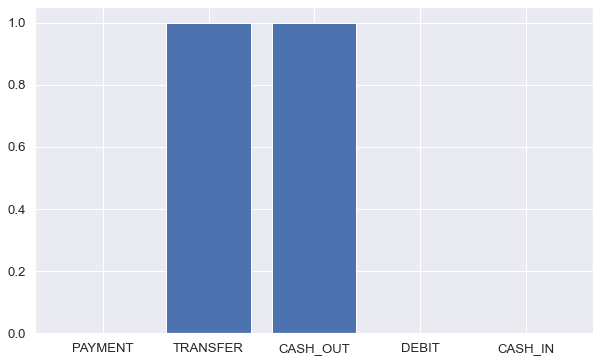

In [27]:
#lets check a scatter plot between amount and isfraud
fig,ax=plt.subplots(figsize=(10,6))
ax =plt.bar(temp_data['type'][:1000],temp_data['isFraud'][:1000])

### the above graph shows on what type of transactions isfraud is possible

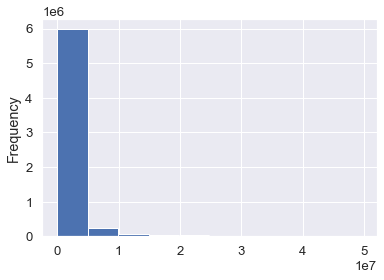

In [28]:
temp_data.newbalanceOrig.plot.hist();

now as al of our data is numeric and there are no missing values so we should be able to build a machine learning model

In [29]:
#lets have a look on our model on more time
temp_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [30]:
# as we have to check for the fraud detection lets have a x and y values
x = temp_data.drop('isFraud',axis=1)
y=temp_data['isFraud']

In [31]:
x

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,0


In [32]:
# now lets import the classification machine learning algorithims as our problem is to classify whether the transaction is 
# fraud or not

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# to split our data into training and testing data and for evaluation

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [51]:
x1=x.head(12725)
x1.head()
len(x1)

12725

In [47]:
y1=y[:12725]
y1

0        0
1        0
2        1
3        1
4        0
        ..
12720    0
12721    0
12722    0
12723    0
12724    0
Name: isFraud, Length: 12725, dtype: int64

In [53]:
categorical_features =['type','nameOrig','nameDest']
one_hot =OneHotEncoder()
transformer =ColumnTransformer([('One_hot',one_hot,categorical_features)],remainder='passthrough')
transformed_x = transformer.fit_transform(x1)

In [54]:
pd.DataFrame(transformed_x).head()

,0
0,"(0, 3)\t1.0\n (0, 1485)\t1.0\n (0, 17678)\..."
1,"(0, 3)\t1.0\n (0, 4428)\t1.0\n (0, 17927)\..."
2,"(0, 4)\t1.0\n (0, 2002)\t1.0\n (0, 13833)\..."
3,"(0, 1)\t1.0\n (0, 11658)\t1.0\n (0, 13699)..."
4,"(0, 3)\t1.0\n (0, 6942)\t1.0\n (0, 14952)\..."


In [56]:
transformed_x.shape

(12725, 21188)

In [57]:
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y1,test_size=0.2)

In [58]:
model=RandomForestClassifier(n_jobs=-1,random_state=2)
model.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=2)

In [59]:
model.score(x_train,y_train)

1.0

In [60]:
model.score(x_test,y_test)

0.9925343811394892

In [61]:
model2 = LogisticRegression()

In [62]:
model2.fit(x_train,y_train)

LogisticRegression()

In [63]:
model2.score(x_test,y_test)

0.9768172888015717

In [64]:
model3 =KNeighborsClassifier()

In [65]:
model3.fit(x_train,y_train)

KNeighborsClassifier()

In [66]:
model3.score(x_test,y_test
            )

0.9917485265225933

In [74]:
y_pred=model2.predict(x_test)

In [76]:
y_pred[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

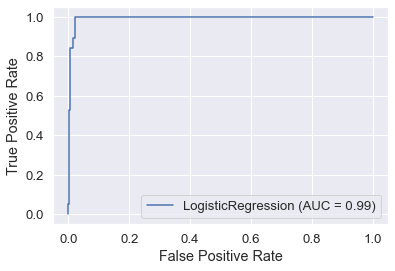

In [78]:
plot_roc_curve(model2,x_test,y_test)

In [85]:
cf=confusion_matrix(y_test,y_pred)

In [88]:
def plot_con_mat(y_test,y_pred):
    fig,ax=plt.subplots()
    sns.set(font_scale=1.2)
    ax=sns.heatmap(cf,annot=True)
    ax.set(title='Confusion matrix',
          xlabel='Predicted Label',
          ylabel='True Label')


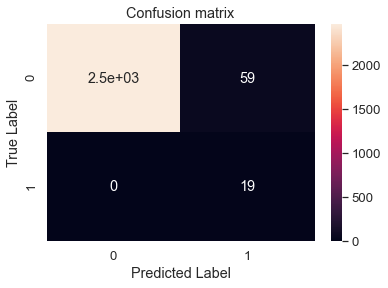

In [89]:
plot_con_mat(y_test,y_pred)

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2526
           1       0.24      1.00      0.39        19

    accuracy                           0.98      2545
   macro avg       0.62      0.99      0.69      2545
weighted avg       0.99      0.98      0.98      2545



In [91]:
model2.coef_

array([[-1.97960835e-10, -4.79906679e-09, -4.87311298e-09, ...,
        -1.71814078e-06, -4.84679746e-07,  0.00000000e+00]])

In [92]:
model.feature_importances_

array([0.00212364, 0.01085317, 0.0019394 , ..., 0.04407207, 0.04233482,
       0.        ])

In [107]:
feature_dict = dict(zip(temp_data.columns,model.feature_importances_))

In [108]:
feature_dict

{'step': 0.0021236430945326184,
 'type': 0.010853168717475452,
 'amount': 0.0019394017155176682,
 'nameOrig': 0.004701998030890685,
 'oldbalanceOrg': 0.010493067449972773,
 'newbalanceOrig': 0.0,
 'nameDest': 0.0,
 'oldbalanceDest': 0.0,
 'newbalanceDest': 0.0,
 'isFraud': 1.7664058631821046e-07,
 'isFlaggedFraud': 1.646505140644493e-05}

In [109]:
feature_df = pd.DataFrame(feature_dict,index=[0])

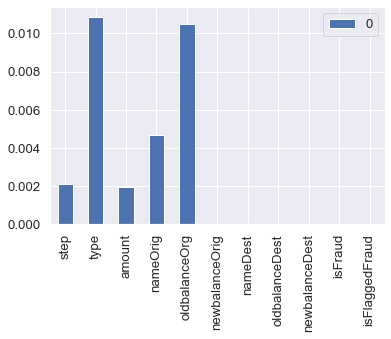

In [97]:
feature_df.T.plot(kind='bar');

### due to low specifications my system couldn't process this much of data so i used a fraction of data for modeling purpose Hence got high accuracies. Hoping for the best!!


  ***thank you!***
  
 